Connected to Python (Greema)

In [ ]:
import sys
sys.path.append('/data/home/gregmi/GSFC-GRASP-Python-Interface/PhD_SQ_1/Simulation/')
sys.path.append("/data/home/gregmi/GSFC-Retrieval-Simulators/ACCP_ArchitectureAndCanonicalCases")
from architectureMap import returnPixel
from ORACLES_GRASP import FindPix, RSP_Run_General, LidarAndMAP, plot_HSRL,RSP_plot,CombinedLidarPolPlot,Ext2Vconc, RSP_Run_General, PlotRandomGuess

from CreateRsltsDict import Read_Data_RSP_Oracles, Read_Data_HSRL_constHgt
from CreateRsltsDict import Read_Data_HSRL_Oracles,Read_Data_HSRL_Oracles_Height,Read_Data_HSRL_Oracles_Height_No355
import netCDF4 as nc
from runGRASP import graspDB, graspRun, pixel, graspYAML
from matplotlib import pyplot as plt
import os
if os.uname()[1]=='uranus': plt.switch_backend('agg')
import numpy as np
import datetime as dt
from numpy import nanmean
import h5py 
# sys.path.append("/home/gregmi/git/GSFC-Retrieval-Simulators/ACCP_ArchitectureAndCanonicalCases")
# from architectureMap import returnPixel
from matplotlib.font_manager import FontProperties
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as mpatches
from matplotlib.ticker import ScalarFormatter
# from Plot_ORACLES import PltGRASPoutput, PlotRetrievals
import yaml
import pickle
import datetime
from netCDF4 import Dataset
from scipy.optimize import curve_fit
import re



In [ ]:
#


# # # # #RSP'''
file_path = "/data/home/gregmi/Data/ORACLES/RSP/"  #Path to the ORACLE data file
file_name =  "RSP1-P3_L1C-RSPCOL-CollocatedRadiances_20180922T151106Z_V003-20210421T233946Z.h5" #Name of the ORACLES file

#HSRL
HSRLfile_path = "/data/home/gregmi/Data/ORACLES/HSRL2" #Path to the ORACLE data file 
HSRLfile_name =  "/HSRL2_P3_20180922_R2.h5" #Name of the ORACLES file

RSP_PixNo = 13201
TelNo = 0 # aggregated altitude. To obtain geometries corresponding to data from the 1880 nm channel, aggregation altitude should be set to 1, while aggregation altitude =0 should be used for all other channels.
nwlIdx = [0,1,2,3,4,6,8] # first  nwl wavelengths
ang1 = 10
ang2 = 120 # :ang angles  #Remove

#Path to the gas absorption (tau) values for gas absorption correction
GasAbsFn = '/data/home/gregmi/Data/GasAbs/shortwave_gas.unlvrtm.nc'
SpecResFnPath = '/data/home/gregmi/Data/ORACLES/RSP/RSP_Spectral_Response/'
#This is required if we want to configure the HSRL yaml file based on the GRASP output for the RSP
noMod =3  #number of aerosol mode, here 2 for fine+coarse mode configuration
 #no of char # this is a varible added to char and modes to avoid char[0]/ mod[0] which doesnt exist

for i in range(1):

    RSP_PixNo = RSP_PixNo +1
    TelNo = 0 # aggregated altitude. To obtain geometries corresponding to data from the 1880 nm channel, aggregation altitude should be set to 1, while aggregation altitude =0 should be used for all other channels.
    RSPwlIdx = nwlIdx[:i+5] # first  nwl wavelengths
    # RSPwlIdx = nwlIdx[:i+5] # first  nwl wavelengths
    # ang1 = 20
    # ang2 = 100 # :ang angles  #Remove

    f1_MAP = h5py.File(file_path+file_name,'r+')   
    Data = f1_MAP['Data']
    LatRSP = f1_MAP['Geometry']['Collocated_Latitude'][TelNo,RSP_PixNo]
    LonRSP = f1_MAP['Geometry']['Collocated_Longitude'][TelNo,RSP_PixNo]
    f1_MAP.close()
    f1= h5py.File(HSRLfile_path + HSRLfile_name,'r+')  #reading hdf5 file  
    
    #Lat and Lon values for that pixel
    LatH = f1['Nav_Data']['gps_lat'][:]
    LonH = f1['Nav_Data']['gps_lon'][:]
    f1.close()
    # HSRLPixNo is the index of HSRL pixel taht corresponds to the RSP Lat Lon
    HSRLPixNo = FindPix(LatH,LonH,LatRSP,LonRSP)[0] + i # Or can manually give the index of the pixel that you are intrested in



In [ ]:
from MiscFuncORACLES import CheckNan_and_Avg, find_nan_indices,CreateDict, HSLR_run

In [ ]:
nwl =3

UNCERT ={}
UNCERT['aodMode'] = 0
UNCERT['aod']= 0
UNCERT['ssaMode'] = 0
UNCERT['k'] = 0
UNCERT['n'] = 0
UNCERT['DP'] = 1
UNCERT['VBS'] =  2e-7     #2.4e-6        #2e-7 # rel %
UNCERT['VEXT'] = 1e-05  #rel% 10%
UNCERT['rv'] = 0
UNCERT['I'] = 0.03
UNCERT['DoLP'] = 0.005


AprioriLagrange = [5e-2,1e-2,5e-1,1e-1,1]



/data/home/gregmi/GSFC-GRASP-Python-Interface/PhD_SQ_1/Simulation/MiscFuncORACLES.py:642: RuntimeWarning: Mean of empty slice
  avg_value = np.nanmean(variable[mask])  # Ignore NaNs


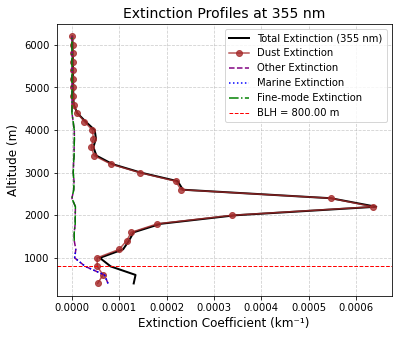

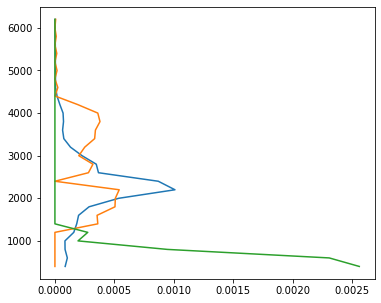

Working in /tmp/tmpgmmq_ing
Starting a new thread for graspRun index 1/1
[0.70653 0.74023 0.75049]
Line812, runGRASP, Mod for GRASPV2, nneds fixing
9 [0.0025133  0.0017331  0.0023395  0.0029317  0.00035085 0.002
 0.00020138 0.00025275 0.00025334]
Line812, runGRASP, Mod for GRASPV2, nneds fixing
9 [0.0025133  0.0017331  0.0023395  0.0029317  0.00035085 0.002
 0.00020138 0.00025275 0.00025334]
Line812, runGRASP, Mod for GRASPV2, nneds fixing
9 [0.0025133  0.0017331  0.0023395  0.0029317  0.00035085 0.002
 0.00020138 0.00025275 0.00025334]
Line812, runGRASP, Mod for GRASPV2, nneds fixing
9 [0.0025133  0.0017331  0.0023395  0.0029317  0.00035085 0.002
 0.00020138 0.00025275 0.00025334]
1 pixels processed in    15.33 seconds ( 0.07 pixels/second)


In [ ]:
hgtInterv= 200
HSRL_sphrodT = HSLR_run("sphro",HSRLfile_path,HSRLfile_name,HSRLPixNo,nwl,hgtInterv, ModeNo=3, updateYaml= False,releaseYAML= True, VertProfConstrain = True,LagrangianOnly = True,  AprioriLagrange =  AprioriLagrange[i])


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


Mode 0
Mode 1
Mode 2
Mode 0
Mode 1
Mode 2
Mode 0
Mode 1
Mode 2
Mode 0
Mode 1
Mode 2
Mode 0
Mode 1
Mode 2


FileNotFoundError: [Errno 2] No such file or directory: '/data/home/gregmi/GRASP_V2/ORACLES_LiDAR_MAP_rslts/Case1/V22018-09-22 18:16:163Sphroid_Hex_HSRL2Retrieval.png'

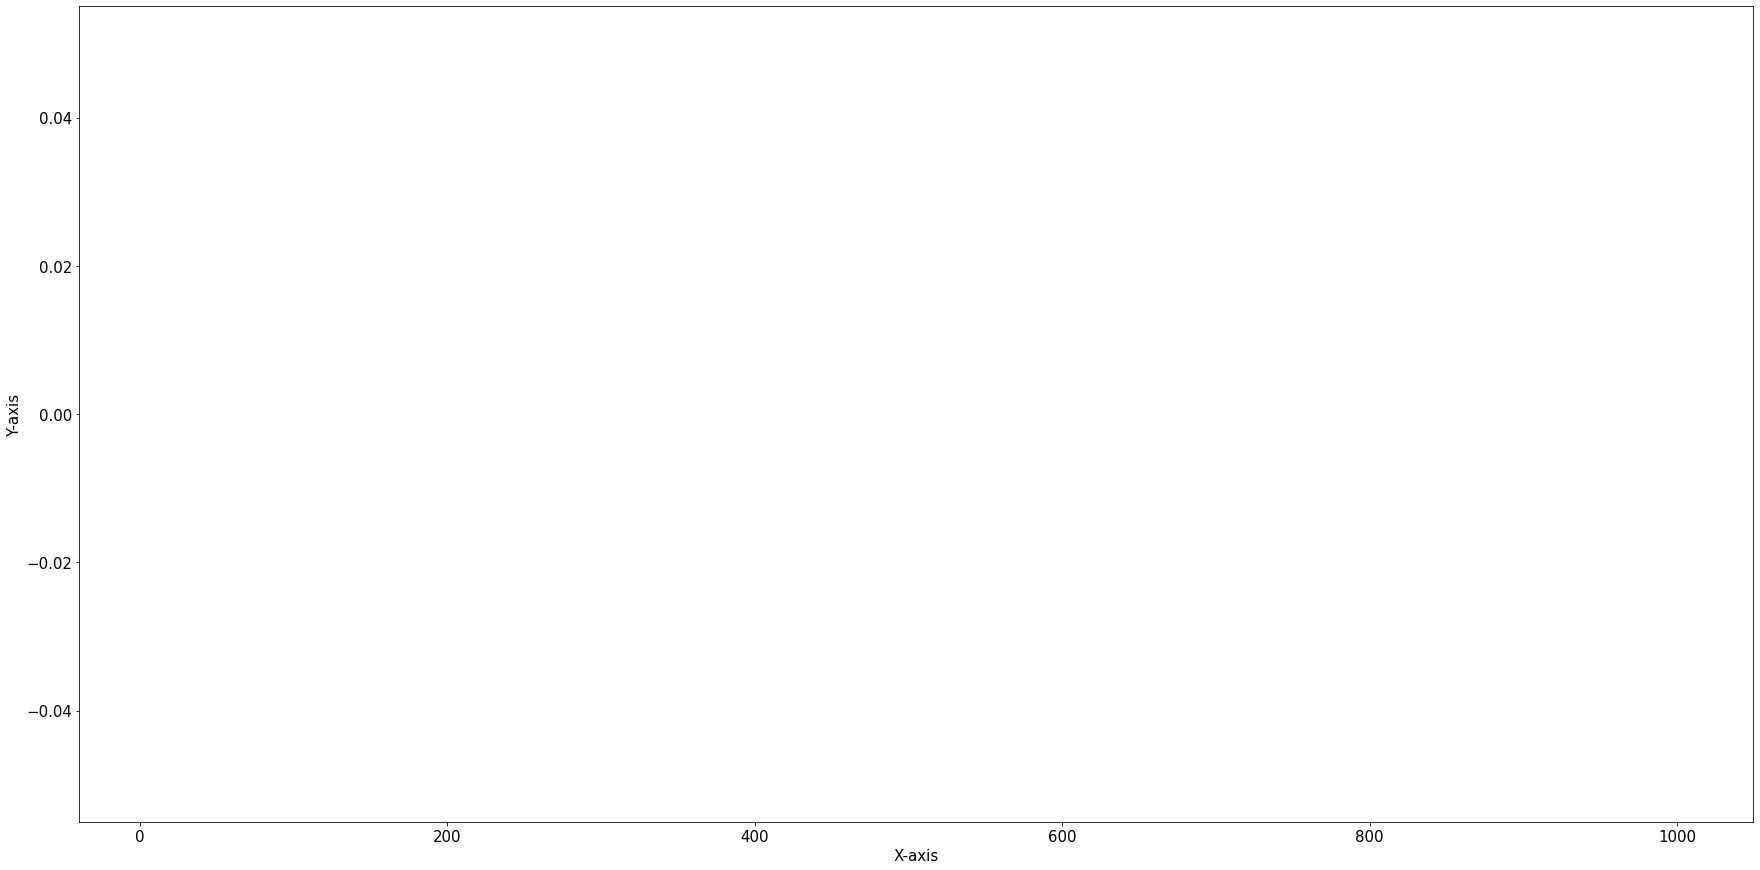

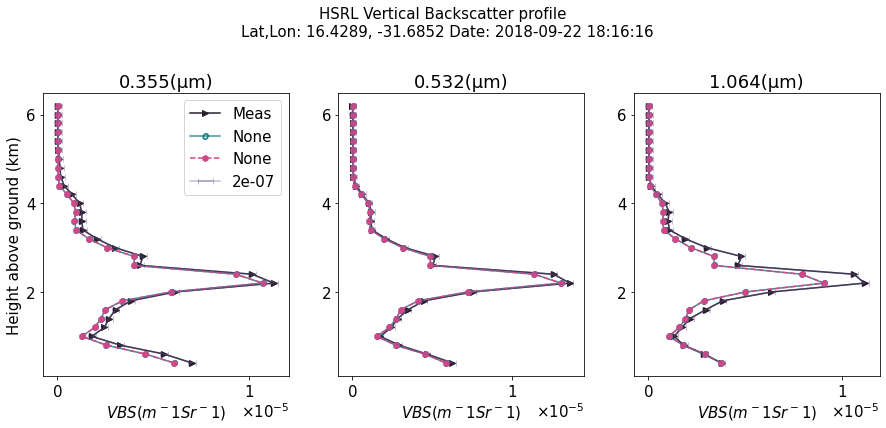

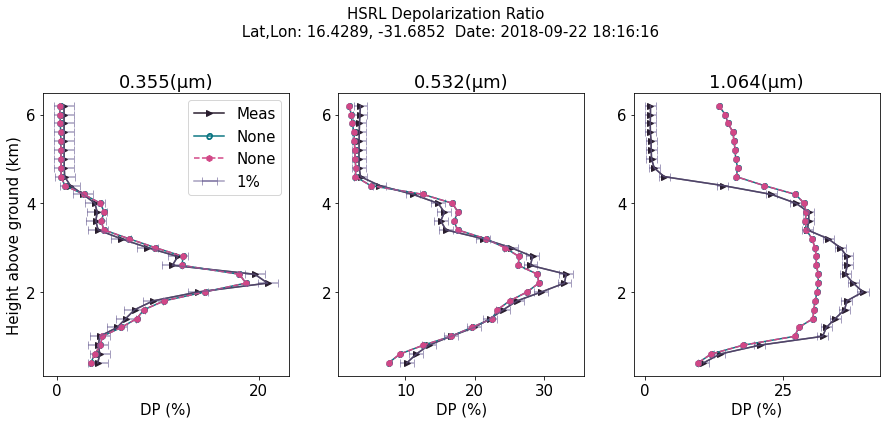

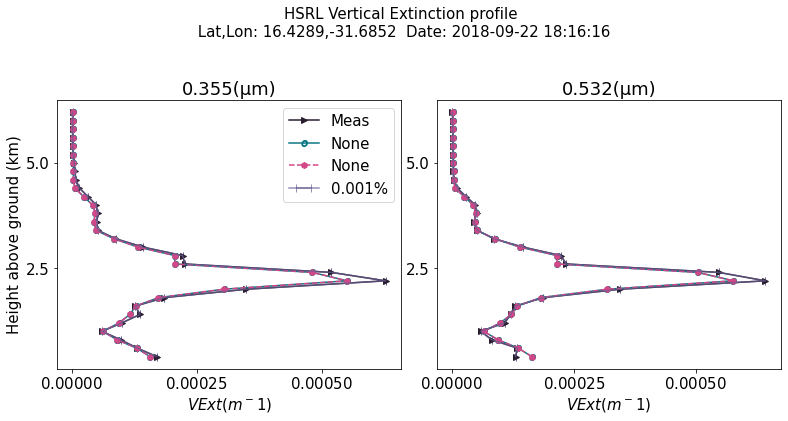

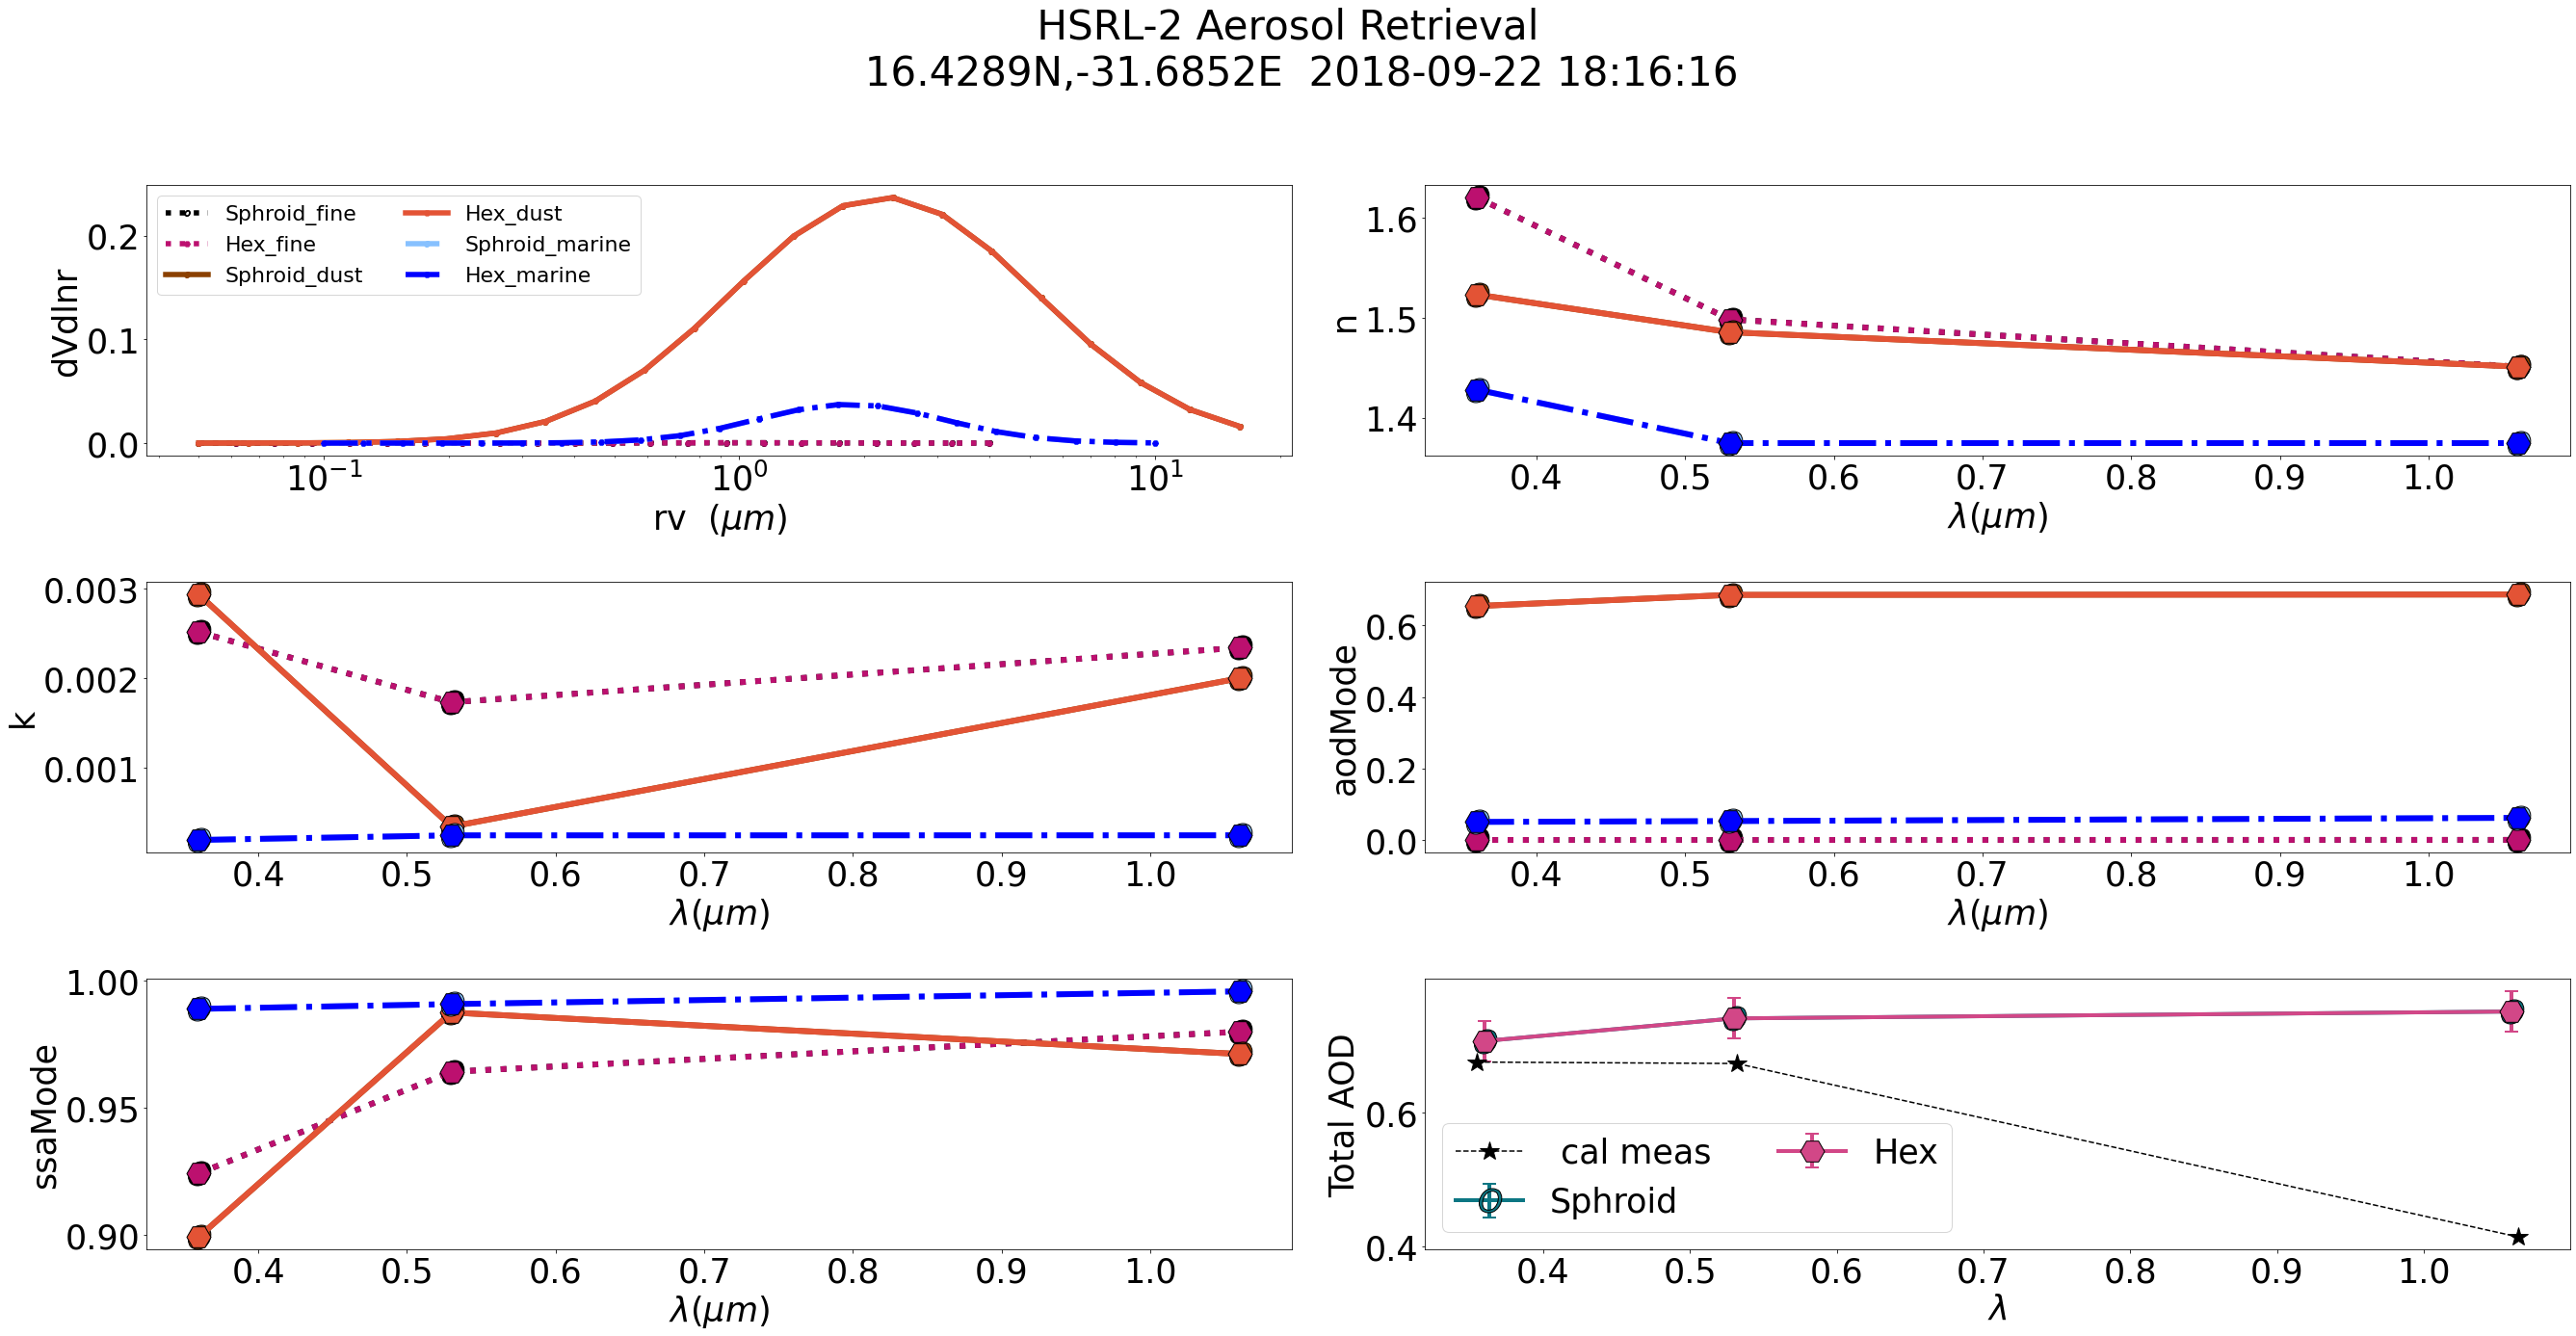

In [ ]:
plot_HSRL(HSRL_sphrodT[0][0],HSRL_sphrodT[0][0],UNCERT, forward = True, retrieval = True, Createpdf = True,PdfName ="/home/gregmi/ORACLES/rsltPdf/HSRL_Only_Plots_444.pdf")


[0.41583426 0.48859863 0.65595339 0.90172567 0.92386145 0.95884234
 0.96255916 0.96299023 0.9797548  0.98844702 1.         0.98348314
 0.9803278  0.98112319 0.95987963 0.91125546 0.89679983 0.89732236
 0.8969678  0.90885275 0.9979258         nan        nan        nan
        nan        nan        nan        nan        nan        nan]
[       nan 0.43442485 0.42888283 0.43638752 0.51325921 0.6831822
 0.94712976 0.97046996 1.00718288 1.01113184 1.01158991 1.02918484
 1.03833697 1.05046536 1.03301402 1.02981617 1.03064907 1.0082769
 0.95720901 0.94206931 0.94260674 0.94223536 0.95466467 1.04757777
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan]


/data/home/gregmi/GSFC-GRASP-Python-Interface/PhD_SQ_1/Simulation/MiscFuncORACLES.py:642: RuntimeWarning: Mean of empty slice
  avg_value = np.nanmean(variable[mask])  # Ignore NaNs


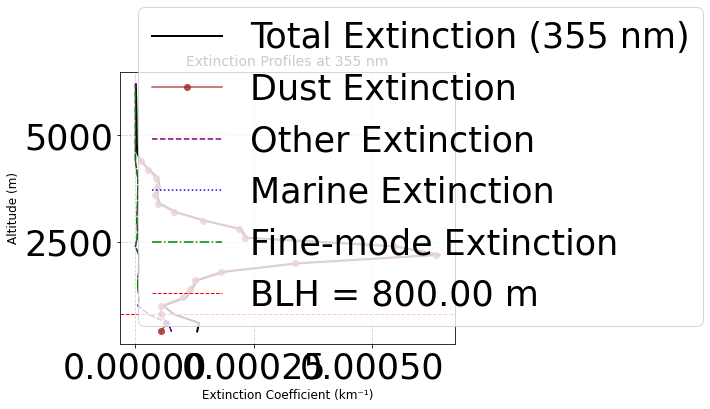

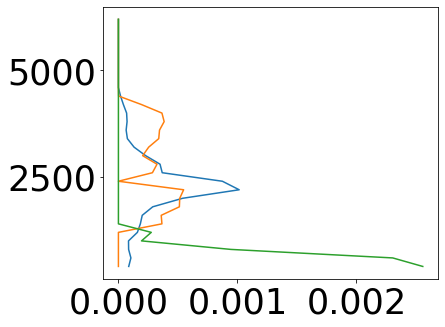

In [ ]:
n = CreateDict(HSRLfile_path , HSRLfile_name, HSRLPixNo, hgtInterv,gaspar=True)

In [ ]:

def CreateDict(HSRLfile_path , HSRLfile_name, HSRLPixNo, hgtInterv,gaspar):


    # Open HSRL file safely
    with h5py.File(HSRLfile_path + HSRLfile_name, 'r') as f1:
        
        # Reading Lidar measurements
        HSRL = f1['DataProducts']
        AirAlt = f1['Nav_Data']['gps_alt'][HSRLPixNo]
        dateTime =dt.datetime.strptime(str(int(f1["header"]['date'][0][0]))+ str(f1['Nav_Data']['UTCtime2'][HSRLPixNo][0]),'%Y%m%d%H%M%S.%f')

        lat = f1['Nav_Data']['gps_lat'][HSRLPixNo]
        lon= f1['Nav_Data']['gps_lon'][HSRLPixNo]
    
        Avg = {}


        # Key measurements
        keyMeas = [
            '355_ext', '532_ext', '1064_ext', 
            '355_bsc', '532_bsc', '1064_bsc', 
            '355_dep', '532_dep', '1064_dep',
            'Dust_Mixing_Ratio', '532_aer_dep', 
            'Angstrom_532_355', 'Angstrom_Spherical'
        ]

        # Apply averaging function
        for key in keyMeas:
            Avg[key] = CheckNan_and_Avg(HSRL[key][HSRLPixNo][:], HSRL['Altitude'][:].flatten(), hgtInterv)


        #checks: Valid height interval [0,Airfract altitide]

        NoisyGround = 200

        ValidHgtrange = np.where((Avg['355_ext'][0][:]>0+NoisyGround) & (Avg['355_ext'][0]<AirAlt))
        Nanidx = find_nan_indices(Avg)
        #Removing the indices with nans from the valid range indices. 
        hVrange= np.setdiff1d(ValidHgtrange, Nanidx)
        # print(hVrange_clean, hVrange,  Nanidx )

        

        height_shape = len(Avg['355_ext'][0][hVrange])
        Range = np.ones((height_shape,3))
        Range[:,0] = Avg['355_ext'][0][hVrange]
        Range[:,1] = Avg['355_ext'][0][hVrange]
        Range[:,2] = Avg['355_ext'][0][hVrange]  # in meters
        
        

        Bext = np.zeros((height_shape,3))
        Bext[:,0] = Avg['355_ext'][1][hVrange]
        Bext[:,1] = Avg['532_ext'][1][hVrange]
        Bext[:,2] = Avg['1064_ext'][1] [hVrange]
        # Bext[0,2] = np.nan  #Setting one of the value in the array to nan so that GRASP will discard this measurement

        Bsca = np.zeros((height_shape,3))
        Bsca[:,0] = Avg['355_bsc'][1][hVrange]
        Bsca[:,1] = Avg['532_bsc'][1] [hVrange]
        Bsca[:,2] = Avg['1064_bsc'][1][hVrange]
        # Bsca[0,2] = np.nan
    
        
        Dep = np.zeros((height_shape,3))
        Dep[:,0] = Avg['355_dep'][1][hVrange]  #Total depolarization ratio
        Dep[:,1] = Avg['532_dep'][1][hVrange]
        Dep[:,2] = Avg['1064_dep'][1] [hVrange]


     
        
        rslt={}

        #Unit conversion 
    
        rslt['meas_VExt'] = Bext / 1000
        rslt['meas_VBS'] = Bsca / 1000 # converting units from km-1 to m-1
        rslt['meas_DP'] = Dep * 100  # in percentage


        rslt['RangeLidar'] = Range

        FilterHgt1 = np.where(Range[:,0] < 300)
        FilterHgt2 = np.where(Range[:,0] > AirAlt - 2600)

        # #Idx near 2500, where Extinction values are valid.
        # maxRIdx = np.where(Range[:,0] == np.max(FilterHgt2))

        # print(maxRIdx, Range(maxRIdx))


        # LR1,LR2,LR3  = rslt['meas_VExt']/rslt['meas_VBS'] 

        # GenerateVext = 

        
        
        for i in range (2):
            rslt['meas_VExt'][:,i][FilterHgt1] = np.nan
            rslt['meas_VExt'][:,i][FilterHgt2] = np.nan


        LR = rslt['meas_VExt']/ rslt['meas_VBS']
        for i in range(LR.shape[1]):  # Iterate over the wavelength columns
            LR[:, i] = pd.Series(LR[:, i]).ffill().to_numpy()

        rslt['meas_VExt'][FilterHgt2] = rslt['meas_VBS'][FilterHgt2]* LR[FilterHgt2]
        
        rslt['meas_VExt'][np.where(rslt['meas_VExt']<0)] = np.nan

        rslt['meas_VExt'][np.isnan(rslt['meas_VExt'])]= np.nan
        rslt['meas_VBS'][np.where(rslt['meas_VBS']<0)] = np.nan
        
        for i in range(rslt['meas_VExt'].shape[1]): 
            rslt['meas_VExt'][:,i] = pd.Series(rslt['meas_VExt'][:,i]).ffill().to_numpy()
            rslt['meas_VBS'][:,i] = pd.Series(rslt['meas_VBS'][:,i]).ffill().to_numpy()


    # --- Calculate Boundary Layer Height ---
    gradDP = np.gradient(Avg['1064_dep'][1], Avg['1064_dep'][0])
    MaxgradDP = np.nanmax(gradDP)
    IdxBlh = np.where(gradDP == MaxgradDP)[0][0]  # Extract first index
    Blh = Avg['1064_dep'][0][IdxBlh]

    # --- Dust Mixing Ratio Calculation ---
    dmr = Avg['Dust_Mixing_Ratio'][1][hVrange]
    # print(Avg['Dust_Mixing_Ratio'][1][hVrange])

    
    aDP = Avg['532_aer_dep'][1][hVrange]
    aDP_max = np.nanmax(aDP) if np.any(np.isfinite(aDP)) else np.nan

    # Dust mixing ratio from paper formula
    dmr2 = ((1 + aDP_max) * aDP) / (aDP_max * (1 + aDP))

    
    # Iterate over the array to replace NaNs
    for i in range(len(dmr2)):
        if np.isnan(dmr2[i]):  # If current value is NaN
            if i >= 2 and not np.isnan(dmr2[i - 2]):  # Check if 2-before value exists and is valid
                dmr2[i] = dmr2[i - 2]
            else:  # If no valid value exists in 2-before, try finding the last valid value
                valid_indices = np.where(np.isfinite(dmr2))[0]
                if valid_indices.size > 0:
                    dmr2[i] = dmr2[valid_indices[0]]  # Use the fi
        

    # print(Avg['Dust_Mixing_Ratio'][1])

    # --- Compute Extinction Contributions ---
    Vdust = rslt['meas_VExt'][:,1] * dmr2
    Voth = rslt['meas_VExt'][:,1] * (1 - dmr2)

    # Ensure Voth is non-negative and replace NaNs
    Voth = np.where(np.isnan(Voth) | (Voth < 0), 0, Voth)

    # Split `Voth` into Marine and Fine modes
    Vmarine = np.copy(Voth)
    Vmarine[IdxBlh:] = np.nan 

    Vfine = np.copy(Voth)
    Vfine[:IdxBlh] = np.nan

    # --- Plotting ---
    plt.figure(figsize=(6, 5))
 
    hgt = Avg['355_ext'][0][hVrange]

    plt.plot(rslt['meas_VExt'][:,1],  hgt, 'k', label='Total Extinction (355 nm)', linewidth=2)
    plt.plot(Vdust,  hgt, color='brown', linestyle='-', marker='o', label='Dust Extinction', alpha=0.8)
    plt.plot(Voth, hgt, color='purple', linestyle='--', label='Other Extinction')
    plt.plot(Vmarine,  hgt, color='blue', linestyle=':', label='Marine Extinction')
    plt.plot(Vfine,  hgt, color='green', linestyle='-.', label='Fine-mode Extinction')

    # Mark Boundary Layer Height
    plt.axhline(Blh, color='r', linestyle='--', linewidth=1, label=f'BLH = {Blh:.2f} m')

    # Labels & Title
    plt.xlabel('Extinction Coefficient (km⁻¹)', fontsize=12)
    plt.ylabel('Altitude (m)', fontsize=12)
    plt.title('Extinction Profiles at 355 nm', fontsize=14)

    # Grid & Legend
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()

    # Show plot
    plt.show()


    DstProf = NormWithNan( hgt, Vdust)
    FineProf = NormWithNan( hgt, Vfine)
    MarineProf = NormWithNan( hgt, Vmarine)

    plt.figure(figsize=(6, 5))
    plt.plot(DstProf[0],DstProf[1])
    plt.plot(FineProf[0],FineProf[1])
    plt.plot(MarineProf[0],MarineProf[1])


    # print(Vdust,Vfine,MarineProf)

    plt.show()


    #Inverting the rslt dict: GRASP needs the profile to be in descending order

    rslt_Inv = {}
    rslt_Inv['meas_VExt'] = rslt['meas_VExt'][::-1]
    rslt_Inv['meas_VBS'] = rslt['meas_VBS'][::-1]
    rslt_Inv['meas_DP'] = rslt['meas_DP'][::-1]
    rslt_Inv['RangeLidar'] = rslt['RangeLidar'][::-1]

    rslt_Inv['lambda'] = np.array([355,532,1064])/1000 #values of HSRL wl in um
    rslt_Inv['wl'] = np.array([355,532,1064])/1000
    rslt_Inv['datetime'] =dateTime
    rslt_Inv['latitude'] = lat
    rslt_Inv['longitude']= lon

    rslt_Inv['OBS_hght']= AirAlt 
    rslt_Inv['OBS_height'] = np.nanmax(Range[:,0])   
        # aircraft altitude in m
    rslt_Inv['land_prct'] = 0 #Ocean Surface

    if gaspar ==True: # Molecular depolarization correction 
        rslt_Inv['gaspar'] = np.array([0.0037,0.0037,0.0037])


    return rslt_Inv, DstProf[0][::-1], FineProf[0][::-1], MarineProf[0][::-1]




/data/home/gregmi/GSFC-GRASP-Python-Interface/PhD_SQ_1/Simulation/MiscFuncORACLES.py:642: RuntimeWarning: Mean of empty slice
  avg_value = np.nanmean(variable[mask])  # Ignore NaNs


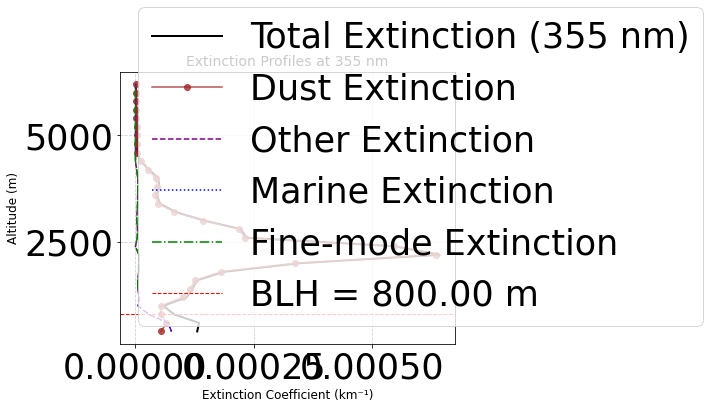

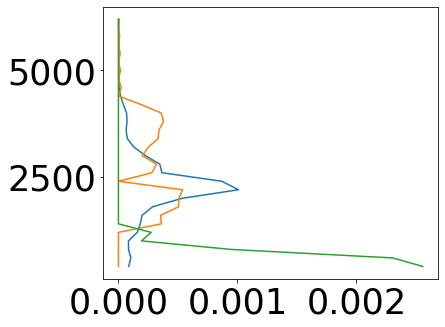

In [ ]:
n = CreateDict(HSRLfile_path , HSRLfile_name, HSRLPixNo, hgtInterv,gaspar=True)

[0.43638752 0.51325921 0.6831822  0.94712976 0.97046996 1.00718288
 1.01113184 1.01158991 1.02918484 1.03833697 1.05046536 1.03301402
 1.02981617 1.03064907 1.0082769  0.95720901 0.94206931 0.94260674
 0.94223536 0.95466467 1.04757777        nan        nan        nan
        nan        nan        nan        nan        nan        nan]


/data/home/gregmi/GSFC-GRASP-Python-Interface/PhD_SQ_1/Simulation/MiscFuncORACLES.py:642: RuntimeWarning: Mean of empty slice
  avg_value = np.nanmean(variable[mask])  # Ignore NaNs


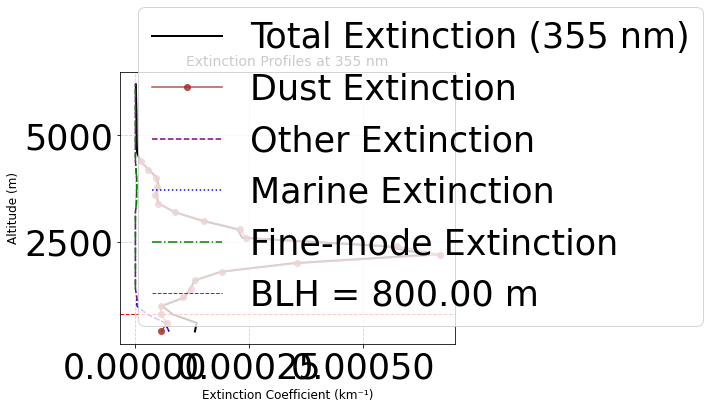

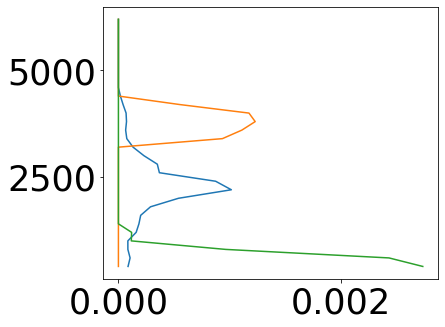

Working in /tmp/tmpq5ced21f
Starting a new thread for graspRun index 1/1
[0.69147 0.7385  0.80532]
Line812, runGRASP, Mod for GRASPV2, nneds fixing
9 [0.0047783  0.0019691  0.002078   0.003452   0.002874   0.0029744
 0.00024663 0.0002509  0.00025032]
Line812, runGRASP, Mod for GRASPV2, nneds fixing
9 [0.0047783  0.0019691  0.002078   0.003452   0.002874   0.0029744
 0.00024663 0.0002509  0.00025032]
Line812, runGRASP, Mod for GRASPV2, nneds fixing
9 [0.0047783  0.0019691  0.002078   0.003452   0.002874   0.0029744
 0.00024663 0.0002509  0.00025032]
Line812, runGRASP, Mod for GRASPV2, nneds fixing
9 [0.0047783  0.0019691  0.002078   0.003452   0.002874   0.0029744
 0.00024663 0.0002509  0.00025032]
1 pixels processed in    13.43 seconds ( 0.07 pixels/second)


In [ ]:
hgtInterv= 200
HSRL_sphrodT = HSLR_run("sphro",HSRLfile_path,HSRLfile_name,HSRLPixNo,nwl,hgtInterv, ModeNo=3, updateYaml= False,releaseYAML= True, VertProfConstrain = True,LagrangianOnly = True,  AprioriLagrange =  AprioriLagrange[i])


Mode 0
Mode 1
Mode 2
Mode 0
Mode 1
Mode 2
Mode 0
Mode 1
Mode 2
Mode 0
Mode 1
Mode 2
Mode 0
Mode 1
Mode 2


FileNotFoundError: [Errno 2] No such file or directory: '/data/home/gregmi/GRASP_V2/ORACLES_LiDAR_MAP_rslts/Case1/V22018-09-22 18:16:163Sphroid_Hex_HSRL2Retrieval.png'

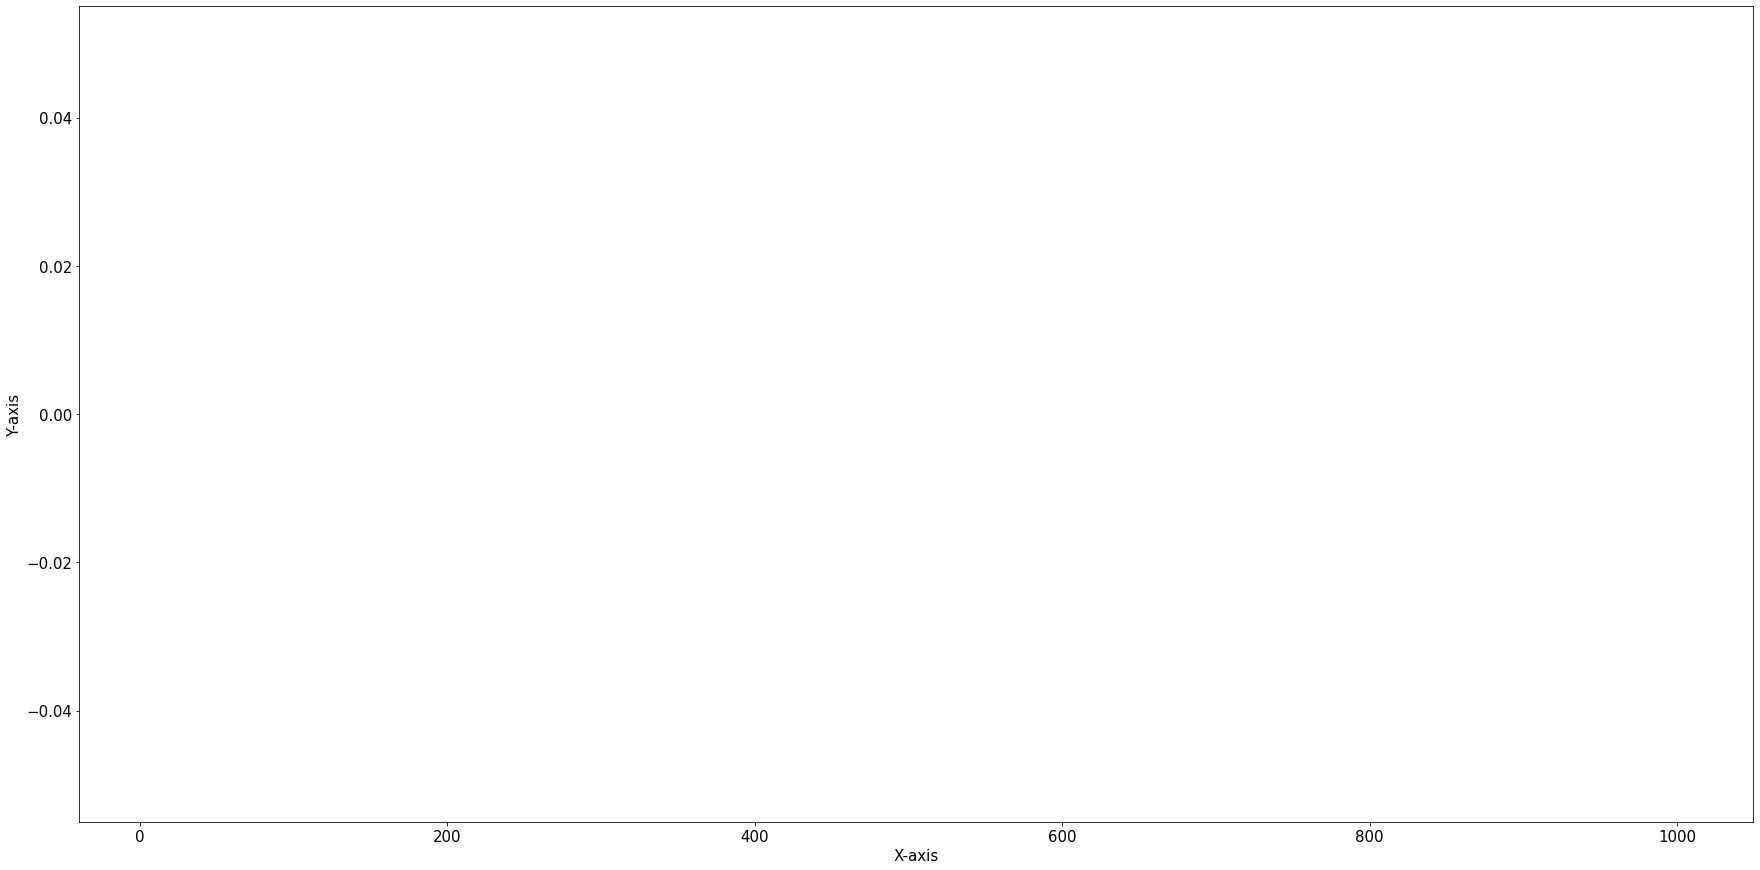

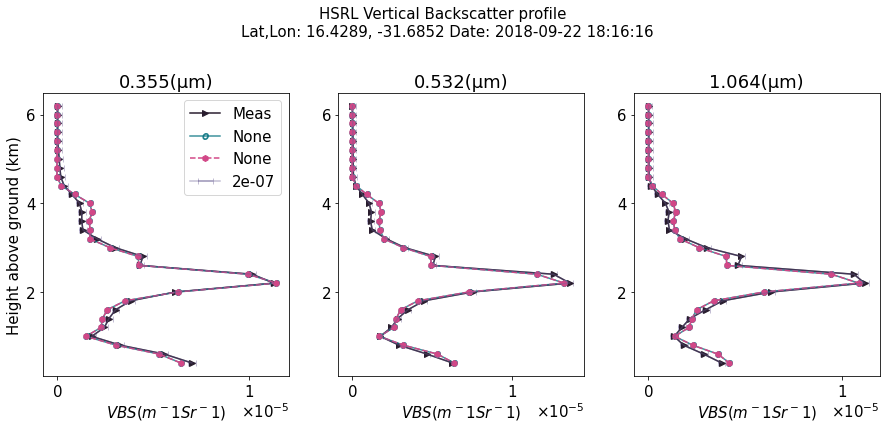

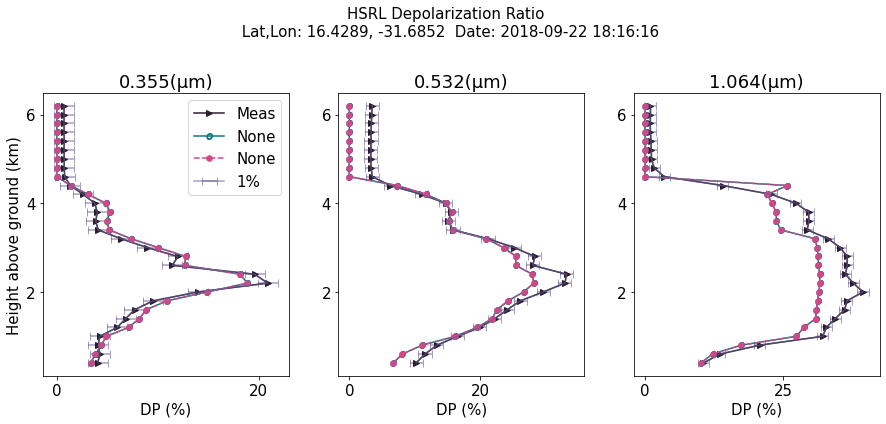

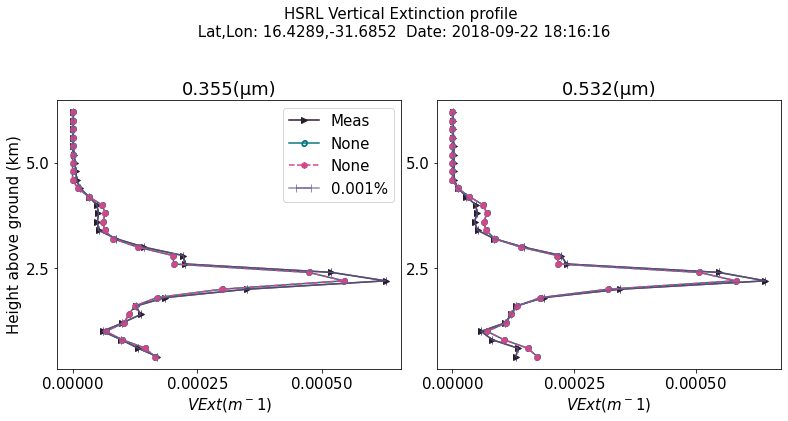

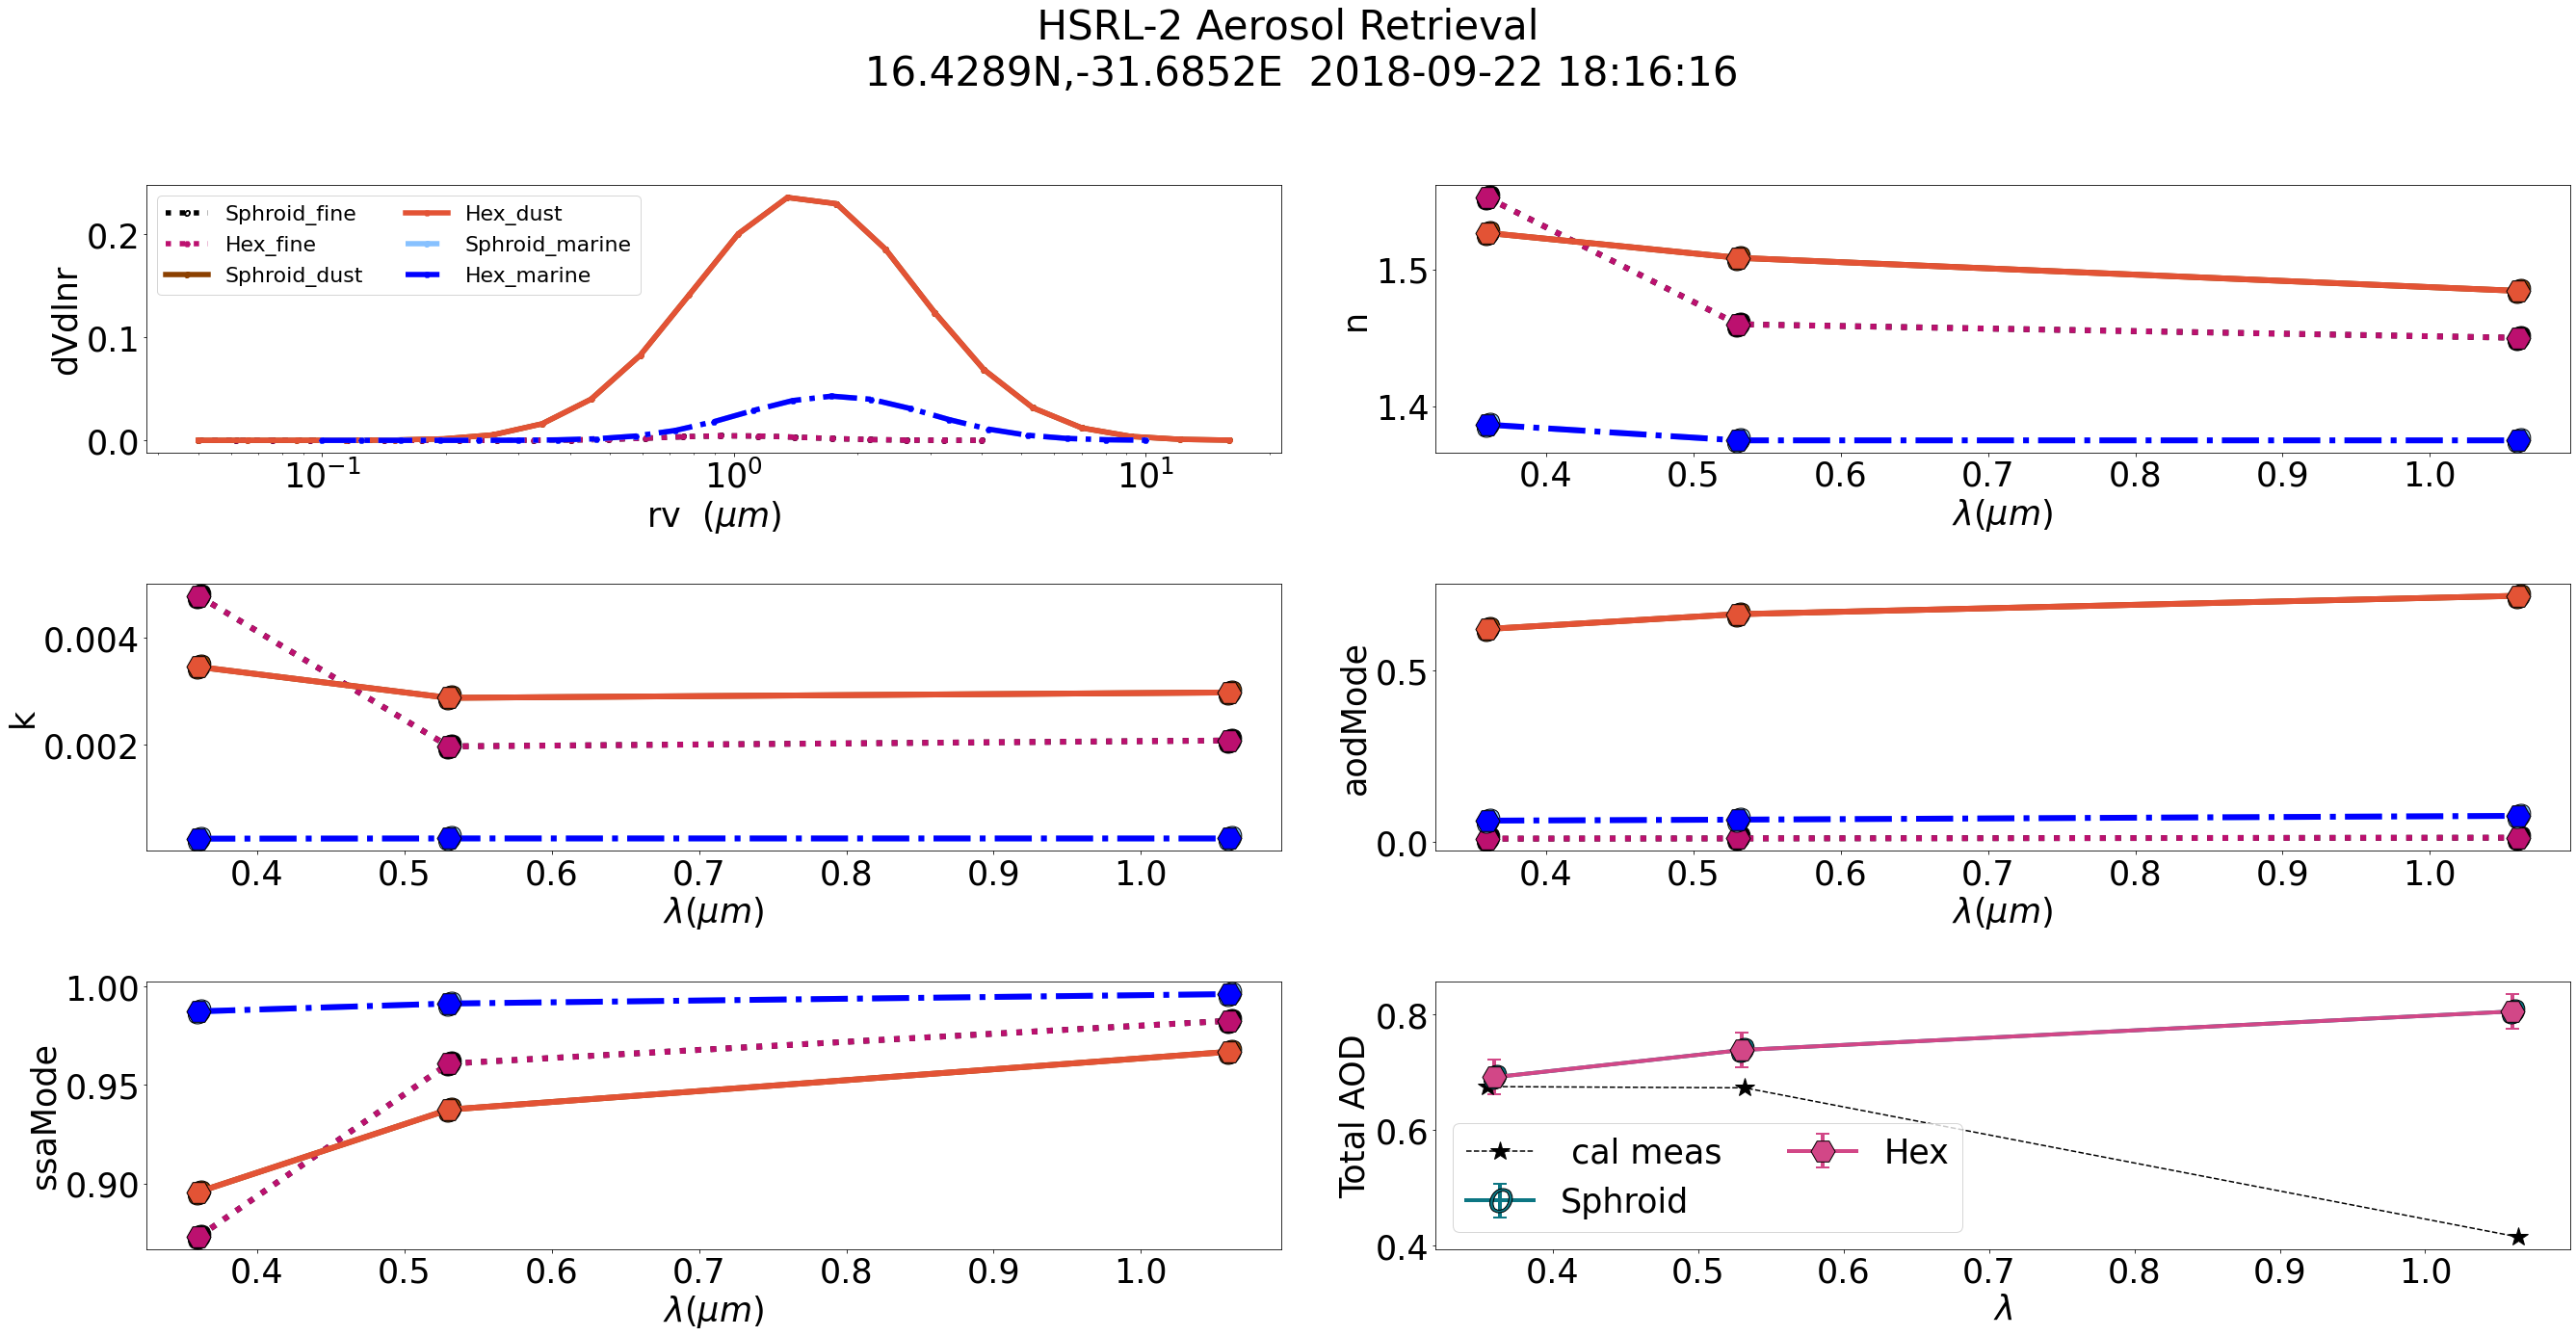

In [ ]:
plot_HSRL(HSRL_sphrodT[0][0],HSRL_sphrodT[0][0],UNCERT, forward = True, retrieval = True, Createpdf = True,PdfName ="/home/gregmi/ORACLES/rsltPdf/HSRL_Only_Plots_444.pdf")


In [ ]:

def CreateDict(HSRLfile_path , HSRLfile_name, HSRLPixNo, hgtInterv,gaspar):


    # Open HSRL file safely
    with h5py.File(HSRLfile_path + HSRLfile_name, 'r') as f1:
        
        # Reading Lidar measurements
        HSRL = f1['DataProducts']
        AirAlt = f1['Nav_Data']['gps_alt'][HSRLPixNo]
        dateTime =dt.datetime.strptime(str(int(f1["header"]['date'][0][0]))+ str(f1['Nav_Data']['UTCtime2'][HSRLPixNo][0]),'%Y%m%d%H%M%S.%f')

        lat = f1['Nav_Data']['gps_lat'][HSRLPixNo]
        lon= f1['Nav_Data']['gps_lon'][HSRLPixNo]
    
        Avg = {}


        # Key measurements
        keyMeas = [
            '355_ext', '532_ext', '1064_ext', 
            '355_bsc', '532_bsc', '1064_bsc', 
            '355_dep', '532_dep', '1064_dep',
            'Dust_Mixing_Ratio', '532_aer_dep', 
            'Angstrom_532_355', 'Angstrom_Spherical'
        ]

        # Apply averaging function
        for key in keyMeas:
            Avg[key] = CheckNan_and_Avg(HSRL[key][HSRLPixNo][:], HSRL['Altitude'][:].flatten(), hgtInterv)


        #checks: Valid height interval [0,Airfract altitide]

        NoisyGround = 200

        ValidHgtrange = np.where((Avg['355_ext'][0][:]>0+NoisyGround) & (Avg['355_ext'][0]<AirAlt))
        Nanidx = find_nan_indices(Avg)
        #Removing the indices with nans from the valid range indices. 
        hVrange= np.setdiff1d(ValidHgtrange, Nanidx)
        # print(hVrange_clean, hVrange,  Nanidx )

        

        height_shape = len(Avg['355_ext'][0][hVrange])
        Range = np.ones((height_shape,3))
        Range[:,0] = Avg['355_ext'][0][hVrange]
        Range[:,1] = Avg['355_ext'][0][hVrange]
        Range[:,2] = Avg['355_ext'][0][hVrange]  # in meters
        
        

        Bext = np.zeros((height_shape,3))
        Bext[:,0] = Avg['355_ext'][1][hVrange]
        Bext[:,1] = Avg['532_ext'][1][hVrange]
        Bext[:,2] = Avg['1064_ext'][1] [hVrange]
        # Bext[0,2] = np.nan  #Setting one of the value in the array to nan so that GRASP will discard this measurement

        Bsca = np.zeros((height_shape,3))
        Bsca[:,0] = Avg['355_bsc'][1][hVrange]
        Bsca[:,1] = Avg['532_bsc'][1] [hVrange]
        Bsca[:,2] = Avg['1064_bsc'][1][hVrange]
        # Bsca[0,2] = np.nan
    
        
        Dep = np.zeros((height_shape,3))
        Dep[:,0] = Avg['355_dep'][1][hVrange]  #Total depolarization ratio
        Dep[:,1] = Avg['532_dep'][1][hVrange]
        Dep[:,2] = Avg['1064_dep'][1] [hVrange]


     
        
        rslt={}

        #Unit conversion 
    
        rslt['meas_VExt'] = Bext / 1000
        rslt['meas_VBS'] = Bsca / 1000 # converting units from km-1 to m-1
        rslt['meas_DP'] = Dep * 100  # in percentage


        rslt['RangeLidar'] = Range

        FilterHgt1 = np.where(Range[:,0] < 300)
        FilterHgt2 = np.where(Range[:,0] > AirAlt - 2600)

        # #Idx near 2500, where Extinction values are valid.
        # maxRIdx = np.where(Range[:,0] == np.max(FilterHgt2))

        # print(maxRIdx, Range(maxRIdx))


        # LR1,LR2,LR3  = rslt['meas_VExt']/rslt['meas_VBS'] 

        # GenerateVext = 

        
        
        for i in range (2):
            rslt['meas_VExt'][:,i][FilterHgt1] = np.nan
            rslt['meas_VExt'][:,i][FilterHgt2] = np.nan


        LR = rslt['meas_VExt']/ rslt['meas_VBS']
        for i in range(LR.shape[1]):  # Iterate over the wavelength columns
            LR[:, i] = pd.Series(LR[:, i]).ffill().to_numpy()

        rslt['meas_VExt'][FilterHgt2] = rslt['meas_VBS'][FilterHgt2]* LR[FilterHgt2]
        
        rslt['meas_VExt'][np.where(rslt['meas_VExt']<0)] = np.nan

        rslt['meas_VExt'][np.isnan(rslt['meas_VExt'])]= np.nan
        rslt['meas_VBS'][np.where(rslt['meas_VBS']<0)] = np.nan
        
        for i in range(rslt['meas_VExt'].shape[1]): 
            rslt['meas_VExt'][:,i] = pd.Series(rslt['meas_VExt'][:,i]).ffill().to_numpy()
            rslt['meas_VBS'][:,i] = pd.Series(rslt['meas_VBS'][:,i]).ffill().to_numpy()


    # --- Calculate Boundary Layer Height ---
    gradDP = np.gradient(Avg['1064_dep'][1], Avg['1064_dep'][0])
    MaxgradDP = np.nanmax(gradDP)
    IdxBlh = np.where(gradDP == MaxgradDP)[0][0]  # Extract first index
    Blh = Avg['1064_dep'][0][IdxBlh]

    # --- Dust Mixing Ratio Calculation ---
    dmr = Avg['Dust_Mixing_Ratio'][1][hVrange]
    # print(Avg['Dust_Mixing_Ratio'][1][hVrange])

    
    aDP = Avg['532_aer_dep'][1][hVrange]
    aDP_max = np.nanmax(aDP) if np.any(np.isfinite(aDP)) else np.nan

    # Dust mixing ratio from paper formula
    dmr2 = ((1 + aDP_max) * aDP) / (aDP_max * (1 + aDP))

    
    # Iterate over the array to replace NaNs
    for i in range(len(dmr2)):
        if np.isnan(dmr2[i]):  # If current value is NaN
            if i >= 2 and not np.isnan(dmr2[i - 2]):  # Check if 2-before value exists and is valid
                dmr2[i] = dmr2[i - 2]
            else:  # If no valid value exists in 2-before, try finding the last valid value
                valid_indices = np.where(np.isfinite(dmr2))[0]
                if valid_indices.size > 0:
                    dmr2[i] = dmr2[valid_indices[0]]  # Use the fi
        

    # print(Avg['Dust_Mixing_Ratio'][1])

    # --- Compute Extinction Contributions ---
    Vdust = rslt['meas_VExt'][:,1] * dmr2
    Voth = rslt['meas_VExt'][:,1] * (1 - dmr2)

    print(dmr2)

    # Ensure Voth is non-negative and replace NaNs
    Voth = np.where(np.isnan(Voth) | (Voth < 0), 0, Voth)

    # Split `Voth` into Marine and Fine modes
    Vmarine = np.copy(Voth)
    Vmarine[IdxBlh:] = np.nan 

    Vfine = np.copy(Voth)
    Vfine[:IdxBlh] = np.nan

    # --- Plotting ---
    plt.figure(figsize=(6, 5))
 
    hgt = Avg['355_ext'][0][hVrange]

    plt.plot(rslt['meas_VExt'][:,1],  hgt, 'k', label='Total Extinction (355 nm)', linewidth=2)
    plt.plot(Vdust,  hgt, color='brown', linestyle='-', marker='o', label='Dust Extinction', alpha=0.8)
    plt.plot(Voth, hgt, color='purple', linestyle='--', label='Other Extinction')
    plt.plot(Vmarine,  hgt, color='blue', linestyle=':', label='Marine Extinction')
    plt.plot(Vfine,  hgt, color='green', linestyle='-.', label='Fine-mode Extinction')

    # Mark Boundary Layer Height
    plt.axhline(Blh, color='r', linestyle='--', linewidth=1, label=f'BLH = {Blh:.2f} m')

    # Labels & Title
    plt.xlabel('Extinction Coefficient (km⁻¹)', fontsize=12)
    plt.ylabel('Altitude (m)', fontsize=12)
    plt.title('Extinction Profiles at 355 nm', fontsize=14)

    # Grid & Legend
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()

    # Show plot
    plt.show()


    DstProf = NormWithNan( hgt, Vdust)
    FineProf = NormWithNan( hgt, Vfine)
    MarineProf = NormWithNan( hgt, Vmarine)

    plt.figure(figsize=(6, 5))
    plt.plot(DstProf[0],DstProf[1])
    plt.plot(FineProf[0],FineProf[1])
    plt.plot(MarineProf[0],MarineProf[1])


    # print(Vdust,Vfine,MarineProf)

    plt.show()


    #Inverting the rslt dict: GRASP needs the profile to be in descending order

    rslt_Inv = {}
    rslt_Inv['meas_VExt'] = rslt['meas_VExt'][::-1]
    rslt_Inv['meas_VBS'] = rslt['meas_VBS'][::-1]
    rslt_Inv['meas_DP'] = rslt['meas_DP'][::-1]
    rslt_Inv['RangeLidar'] = rslt['RangeLidar'][::-1]

    rslt_Inv['lambda'] = np.array([355,532,1064])/1000 #values of HSRL wl in um
    rslt_Inv['wl'] = np.array([355,532,1064])/1000
    rslt_Inv['datetime'] =dateTime
    rslt_Inv['latitude'] = lat
    rslt_Inv['longitude']= lon

    rslt_Inv['OBS_hght']= AirAlt 
    rslt_Inv['OBS_height'] = np.nanmax(Range[:,0])   
        # aircraft altitude in m
    rslt_Inv['land_prct'] = 0 #Ocean Surface

    if gaspar ==True: # Molecular depolarization correction 
        rslt_Inv['gaspar'] = np.array([0.0037,0.0037,0.0037])


    return rslt_Inv, DstProf[0][::-1], FineProf[0][::-1], MarineProf[0][::-1]




[0.41583426 0.48859863 0.65595339 0.90172567 0.92386145 0.95884234
 0.96255916 0.96299023 0.9797548  0.98844702 1.         0.98348314
 0.9803278  0.98112319 0.95987963 0.91125546 0.89679983 0.89732236
 0.8969678  0.90885275 0.9979258  0.90885275 0.9979258  0.90885275
 0.9979258  0.90885275 0.9979258  0.90885275 0.9979258  0.90885275]


/data/home/gregmi/GSFC-GRASP-Python-Interface/PhD_SQ_1/Simulation/MiscFuncORACLES.py:642: RuntimeWarning: Mean of empty slice
  avg_value = np.nanmean(variable[mask])  # Ignore NaNs


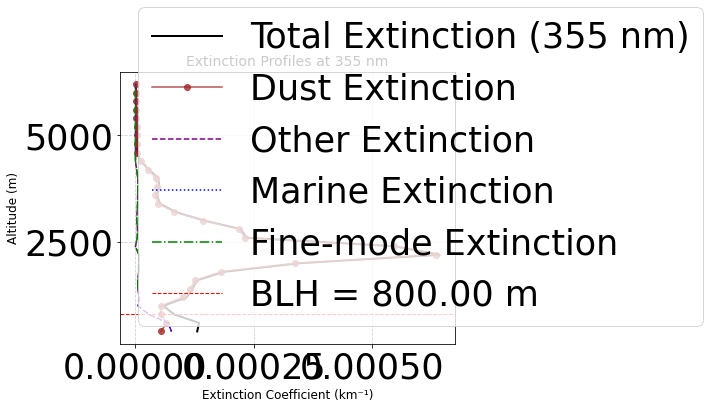

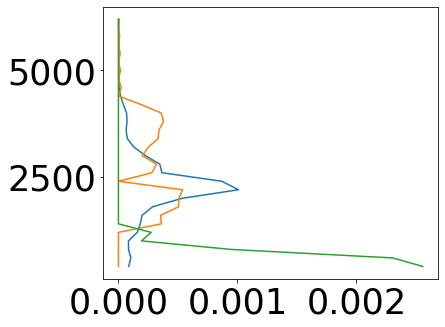

In [ ]:
n = CreateDict(HSRLfile_path , HSRLfile_name, HSRLPixNo, hgtInterv,gaspar=True)

Restarted Python (Greema)